Importing Required Libraries and Data Loading

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (assuming it's in a CSV file)
file_path = r"C:\Users\94718\OneDrive\Desktop\NIBM\Principle of DS\ProtofolioIndi\GitCode1\PRINCIPLES-OF-DATA-SCIENCE-Portfolio\Data Acquisition\Data\supermarket_sales - Sheet1.csv"  # Change this to your actual file path
supermarket_data = pd.read_csv(file_path)

# Display basic information
print("Dataset Info:")
print(supermarket_data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margi

Data Cleaning and Preprocessing, Checking Missing values 

In [4]:
# Check for missing values
print("\nMissing Values:")
print(supermarket_data.isnull().sum())


Missing Values:
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [6]:
#  Check for Duplicate Records

# Check if there are any duplicate rows in the dataset
if supermarket_data.duplicated().any():
    print("\nThere are duplicate records in the dataset.")
else:
    print("\nNo duplicate records found in the dataset.")

# Optionally, check for duplicates based on specific columns
if supermarket_data.duplicated(subset=['Invoice ID', 'Product line']).any():
    print("\nThere are duplicate records based on 'Invoice ID' and 'Product line'.")
else:
    print("\nNo duplicate records based on 'Invoice ID' and 'Product line'.")



No duplicate records found in the dataset.

No duplicate records based on 'Invoice ID' and 'Product line'.


In [7]:
# Convert 'Date' column to datetime
supermarket_data['Date'] = pd.to_datetime(supermarket_data['Date'])

# Convert 'Time' column to datetime (to extract hour)
supermarket_data['Hour'] = pd.to_datetime(supermarket_data['Time']).dt.hour

# Descriptive Statistics
print("\nDescriptive Statistics:")
print(supermarket_data.describe())




Descriptive Statistics:
        Unit price     Quantity       Tax 5%        Total  \
count  1000.000000  1000.000000  1000.000000  1000.000000   
mean     55.672130     5.510000    15.379369   322.966749   
min      10.080000     1.000000     0.508500    10.678500   
25%      32.875000     3.000000     5.924875   124.422375   
50%      55.230000     5.000000    12.088000   253.848000   
75%      77.935000     8.000000    22.445250   471.350250   
max      99.960000    10.000000    49.650000  1042.650000   
std      26.494628     2.923431    11.708825   245.885335   

                             Date        cogs  gross margin percentage  \
count                        1000  1000.00000             1.000000e+03   
mean   2019-02-14 00:05:45.600000   307.58738             4.761905e+00   
min           2019-01-01 00:00:00    10.17000             4.761905e+00   
25%           2019-01-24 00:00:00   118.49750             4.761905e+00   
50%           2019-02-13 00:00:00   241.76000          

C:\Users\94718\AppData\Local\Temp\ipykernel_21712\1557890761.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  supermarket_data['Hour'] = pd.to_datetime(supermarket_data['Time']).dt.hour


Above Descriptive Statistics: A statistical summary of the numerical columns is displayed, including count, mean, standard deviation, min, and max values.

In [8]:
supermarket_data.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,10


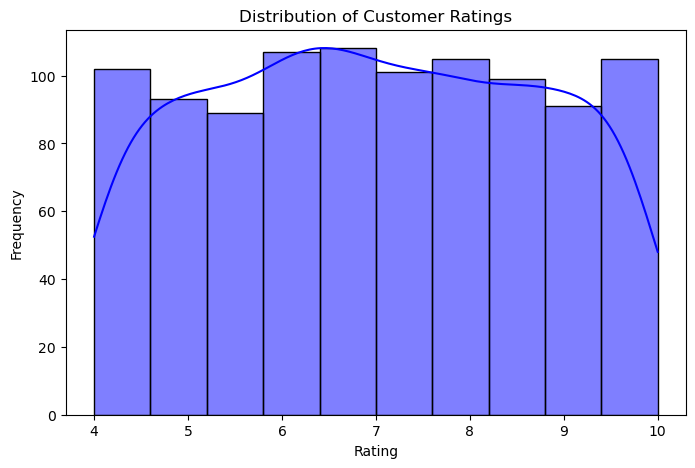

In [10]:
# Visualization: Distribution of Customer Ratings
plt.figure(figsize=(8, 5))
sns.histplot(supermarket_data['Rating'], bins=10, kde=True, color='blue')
plt.title("Distribution of Customer Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

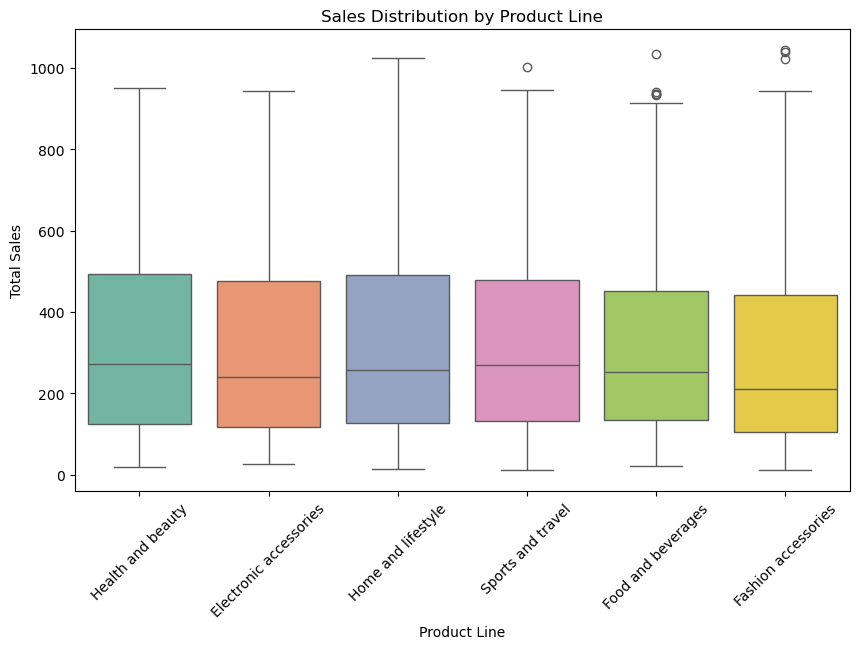

In [19]:
# Visualization: Sales Distribution by Product Line using Boxplot
plt.figure(figsize=(10, 6))

# Assign 'Product line' to hue and disable legend
sns.boxplot(x='Product line', y='Total', data=supermarket_data, palette="Set2", hue='Product line', legend=False)

plt.xticks(rotation=45)
plt.title("Sales Distribution by Product Line")
plt.xlabel("Product Line")
plt.ylabel("Total Sales")
plt.show()



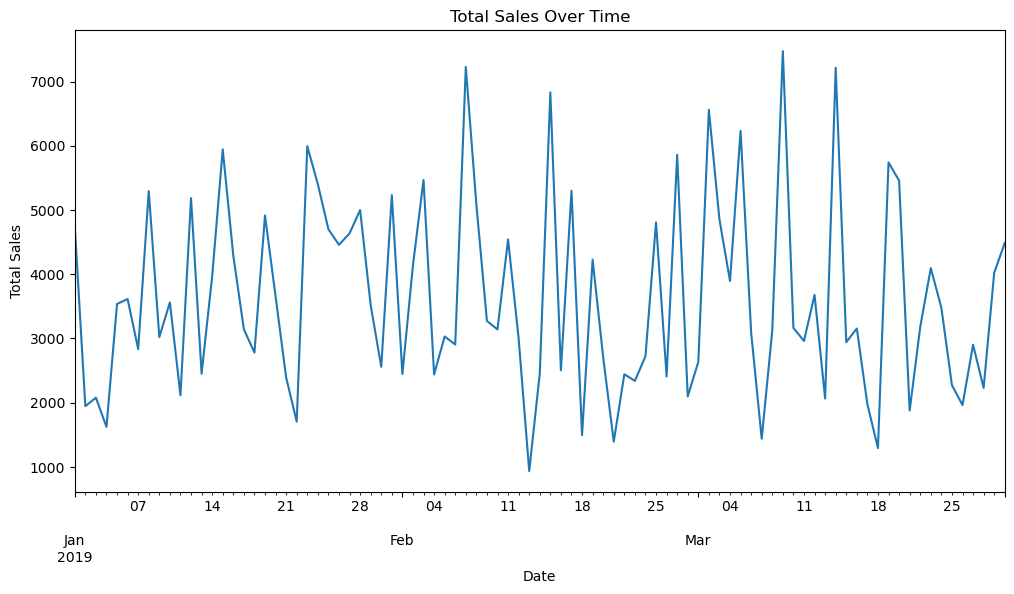

In [12]:
# Visualization: Total Sales Over Time
plt.figure(figsize=(12, 6))
supermarket_data.groupby('Date')['Total'].sum().plot()
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

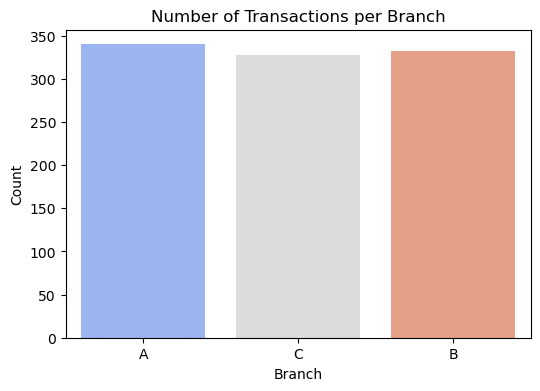

In [18]:
# Visualization: Number of Transactions per Branch
plt.figure(figsize=(6, 4))

# Assign 'Branch' to hue and disable legend
sns.countplot(x='Branch', hue='Branch', data=supermarket_data, palette="coolwarm", legend=False)

plt.title("Number of Transactions per Branch")
plt.xlabel("Branch")
plt.ylabel("Count")
plt.show()


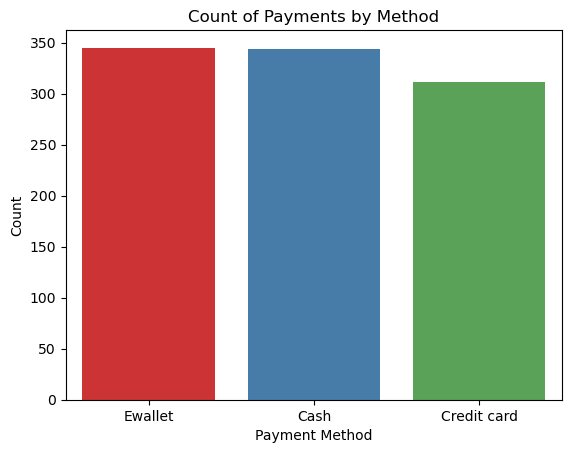

In [15]:
# Fix: Assign x variable to hue and set legend=False
sns.countplot(x='Payment', hue='Payment', data=supermarket_data, palette="Set1", legend=False)

plt.title("Count of Payments by Method")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.show()

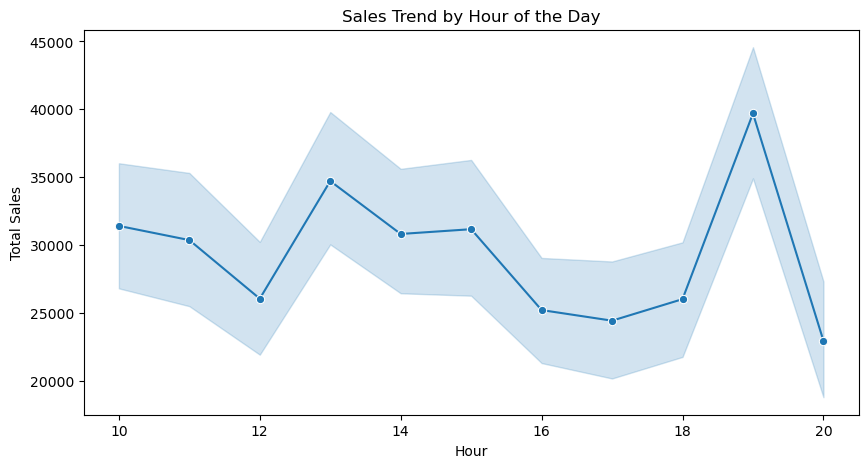

In [16]:
# Visualization: Sales Trend by Hour of the Day
plt.figure(figsize=(10, 5))
sns.lineplot(x=supermarket_data['Hour'], y=df['Total'], estimator='sum', data=df, marker="o")
plt.title("Sales Trend by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Total Sales")
plt.show()

In [20]:
# Check column names
print(supermarket_data.columns)


Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Hour'],
      dtype='object')


In [21]:
import numpy as np

# Select numerical columns for outlier detection
num_cols = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating']

# Function to detect outliers using IQR method
def detect_outliers_iqr(df, columns):
    outlier_rows = []
    for col in columns:
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find rows where the column value is an outlier
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_rows.append(outliers)

        # Print outlier details for this column
        print(f"\n📌 **Outliers detected in '{col}':**")
        print(outliers)

    # Combine all outlier rows and drop duplicates
    all_outliers = pd.concat(outlier_rows).drop_duplicates()
    return all_outliers

# Find and print outlier rows
outliers_df = detect_outliers_iqr(supermarket_data, num_cols)

# If outliers exist, display them
if not outliers_df.empty:
    print("\n✅ **Rows containing outliers:**")
    print(outliers_df)
else:
    print("\n✅ No outliers detected in the dataset.")



📌 **Outliers detected in 'Unit price':**
Empty DataFrame
Columns: [Invoice ID, Branch, City, Customer type, Gender, Product line, Unit price, Quantity, Tax 5%, Total, Date, Time, Payment, cogs, gross margin percentage, gross income, Rating, Hour]
Index: []

📌 **Outliers detected in 'Quantity':**
Empty DataFrame
Columns: [Invoice ID, Branch, City, Customer type, Gender, Product line, Unit price, Quantity, Tax 5%, Total, Date, Time, Payment, cogs, gross margin percentage, gross income, Rating, Hour]
Index: []

📌 **Outliers detected in 'Tax 5%':**
      Invoice ID Branch       City Customer type  Gender         Product line  \
166  234-65-2137      C  Naypyitaw        Normal    Male   Home and lifestyle   
167  687-47-8271      A     Yangon        Normal    Male  Fashion accessories   
350  860-79-0874      C  Naypyitaw        Member  Female  Fashion accessories   
357  554-42-2417      C  Naypyitaw        Normal  Female    Sports and travel   
422  271-88-8734      C  Naypyitaw        M

C:\Users\94718\AppData\Local\Temp\ipykernel_21712\3596434249.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Total', data=supermarket_data, palette="pastel")
c:\Users\94718\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


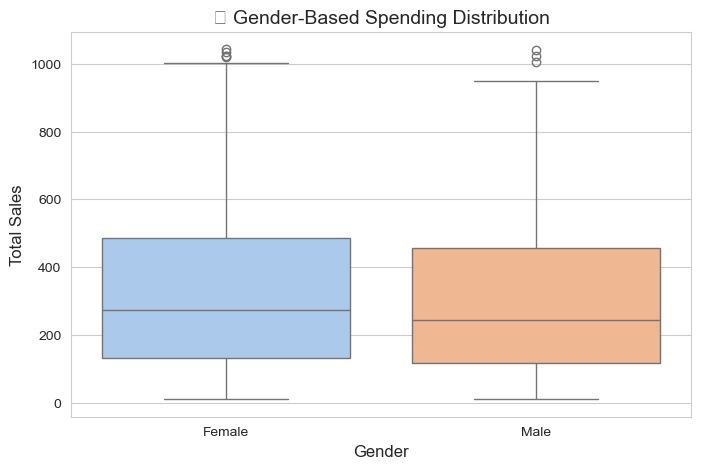

In [24]:
# Set Seaborn style
sns.set_style("whitegrid")
# 6️⃣ **Gender-Based Spending Analysis**
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='Total', data=supermarket_data, palette="pastel")
plt.title("👥 Gender-Based Spending Distribution", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.show()

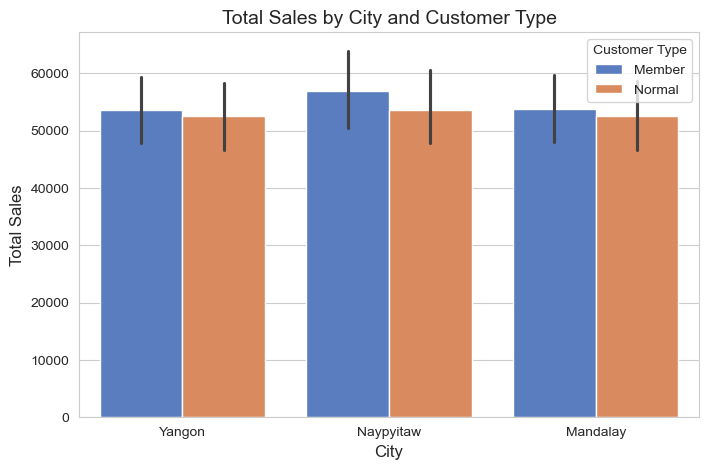

In [29]:
plt.figure(figsize=(8, 5))
sns.barplot(x='City', y='Total', hue='Customer type', data=supermarket_data, estimator=sum, palette="muted")
plt.title("Total Sales by City and Customer Type", fontsize=14)
plt.xlabel("City", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.legend(title="Customer Type")
plt.show()


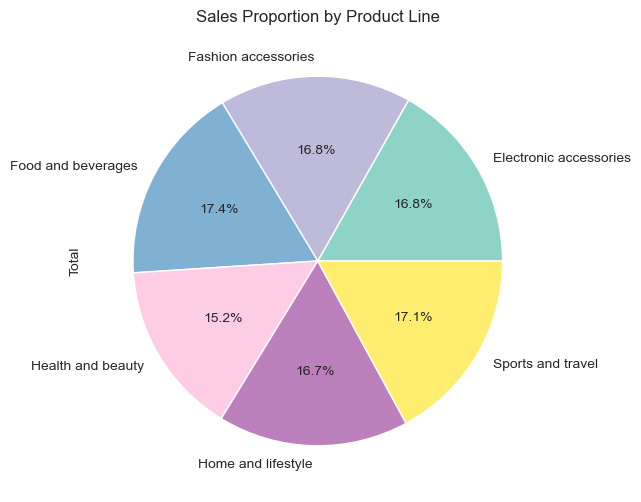

In [38]:
# Pie chart for sales proportion by Product Line
product_line_sales = supermarket_data.groupby('Product line')['Total'].sum()
product_line_sales.plot.pie(autopct='%1.1f%%', figsize=(8, 6), colormap="Set3")
plt.title("Sales Proportion by Product Line")
plt.show()


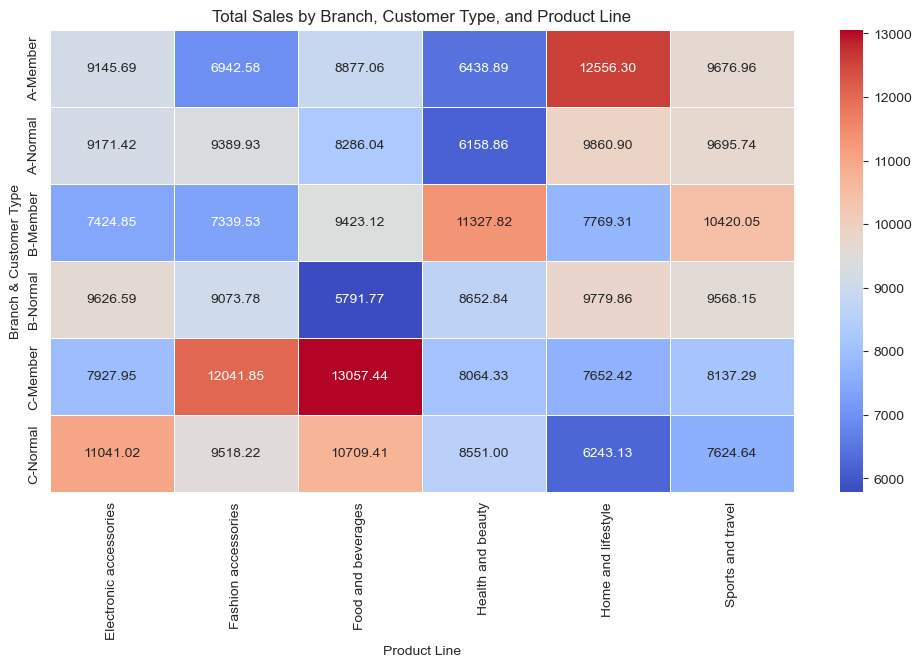

In [39]:

# Ensure 'Total' is treated as numeric
supermarket_data['Total'] = pd.to_numeric(supermarket_data['Total'], errors='coerce')

# Create a pivot table to sum total sales by Branch, Customer type, and Product line
pivot_data = supermarket_data.pivot_table(values='Total', index=['Branch', 'Customer type'], columns='Product line', aggfunc='sum')

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Total Sales by Branch, Customer Type, and Product Line')
plt.ylabel('Branch & Customer Type')
plt.xlabel('Product Line')
plt.show()


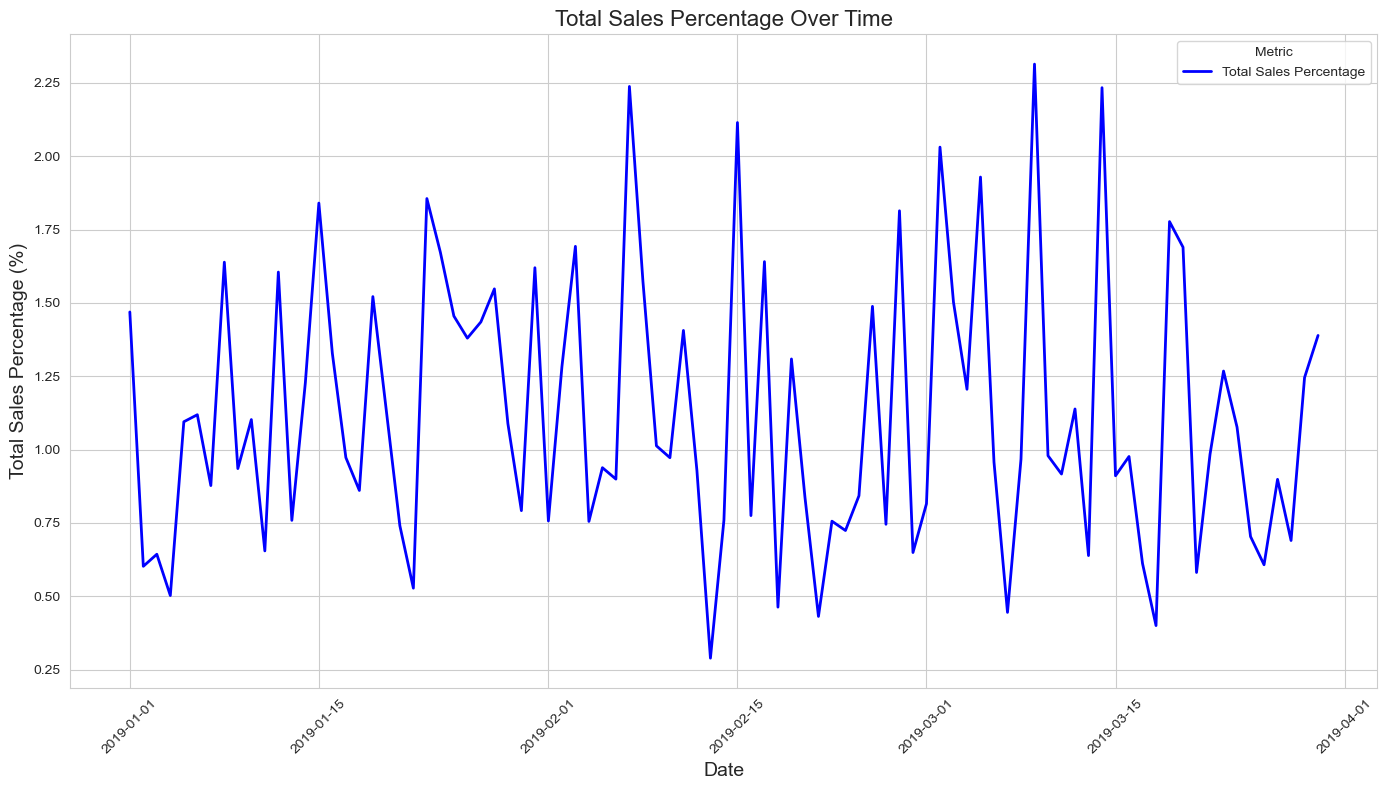

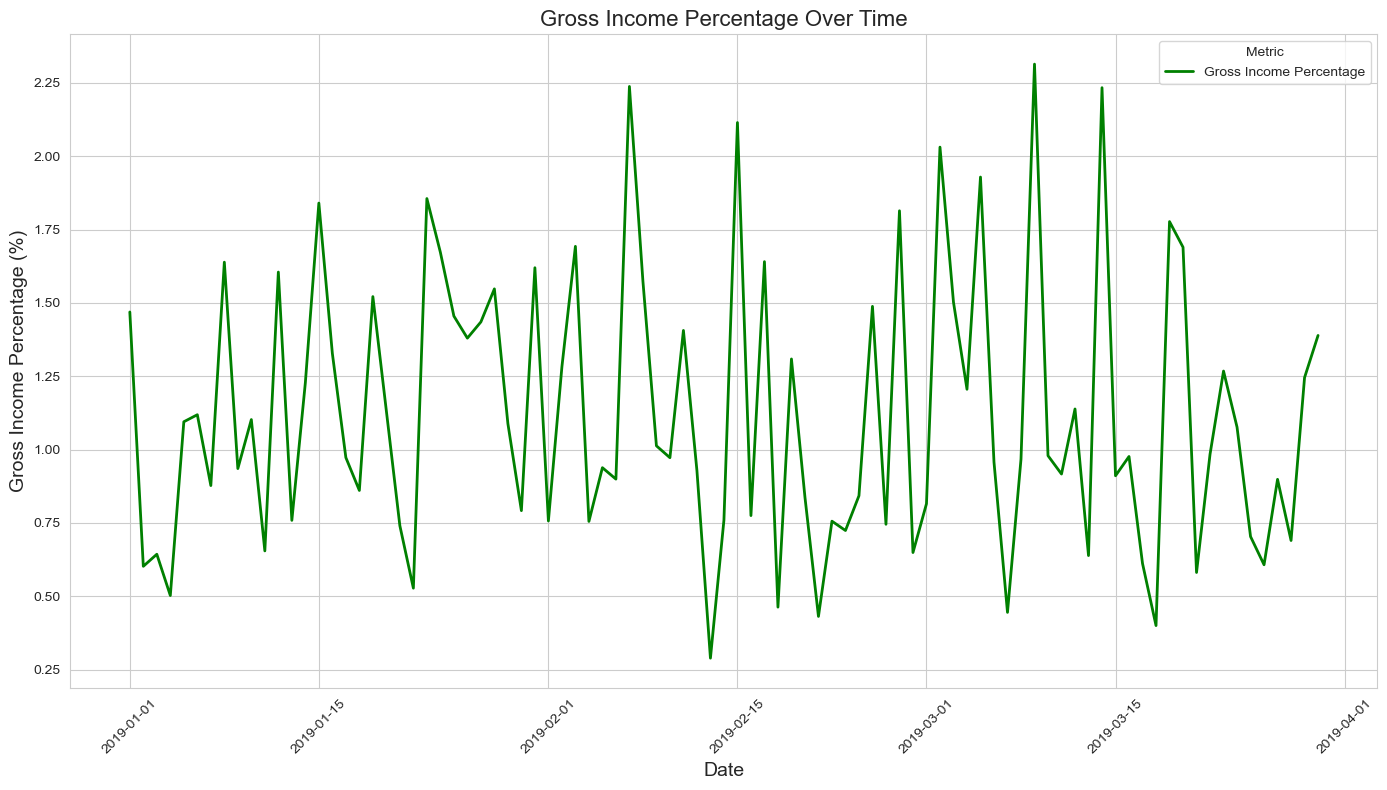

In [48]:
# Convert the 'Date' column to datetime format (if not already done)
supermarket_data['Date'] = pd.to_datetime(supermarket_data['Date'], format='%m/%d/%Y')

# Calculate the total values for Total and Gross Income to compute percentages
total_sales_sum = supermarket_data['Total'].sum()
gross_income_sum = supermarket_data['gross income'].sum()

# Calculate the percentage of Total and Gross Income
supermarket_data['Total Percentage'] = (supermarket_data['Total'] / total_sales_sum) * 100
supermarket_data['Gross Income Percentage'] = (supermarket_data['gross income'] / gross_income_sum) * 100

# Group data by Date and calculate the daily sum of percentages
daily_percentage = supermarket_data.groupby('Date')[['Total Percentage', 'Gross Income Percentage']].sum().reset_index()

# Plot the Total Sales Percentage
plt.figure(figsize=(14, 8))
sns.lineplot(data=daily_percentage, x='Date', y='Total Percentage', label='Total Sales Percentage', color='b', linewidth=2)
plt.title('Total Sales Percentage Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales Percentage (%)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

# Plot the Gross Income Percentage
plt.figure(figsize=(14, 8))
sns.lineplot(data=daily_percentage, x='Date', y='Gross Income Percentage', label='Gross Income Percentage', color='g', linewidth=2)
plt.title('Gross Income Percentage Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Gross Income Percentage (%)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


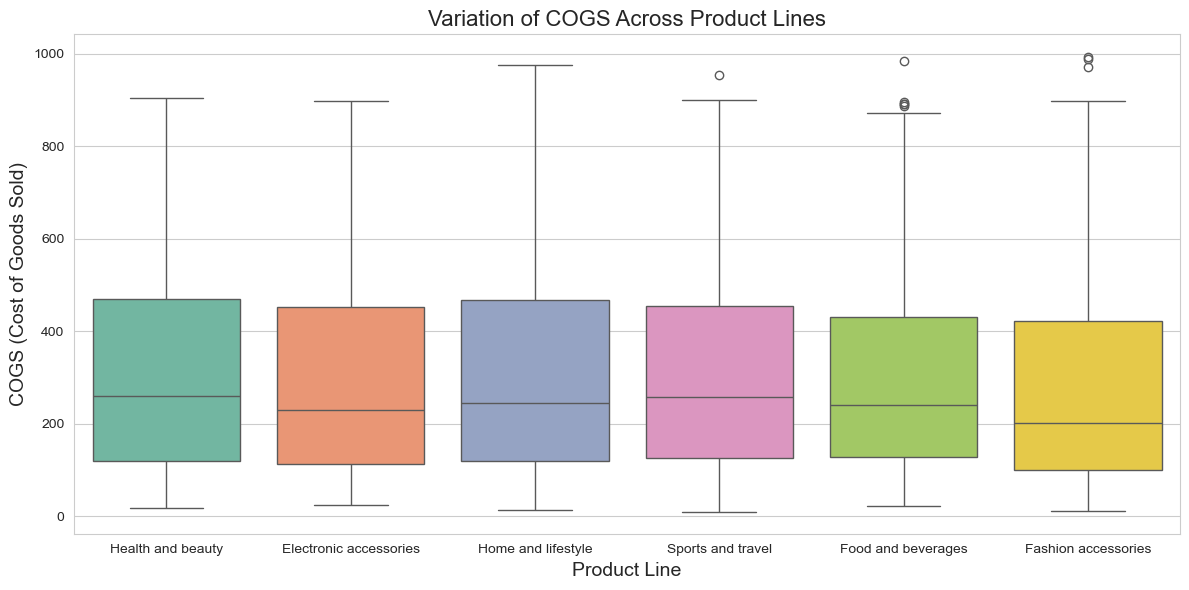

In [50]:
# Plotting COGS variation across different product lines with hue assigned
plt.figure(figsize=(12, 6))
sns.boxplot(data=supermarket_data, x='Product line', y='cogs', hue='Product line', palette='Set2', legend=False)

# Adding a title and labels
plt.title('Variation of COGS Across Product Lines', fontsize=16)
plt.xlabel('Product Line', fontsize=14)
plt.ylabel('COGS (Cost of Goods Sold)', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()
